In [6]:
import os
def create_dataset(src):
    """
    Takes an source path that will create a dataset assuming it has
    'labels' (subfolder) and  storing 'paths' in the dictionary

    Parameters
    ----------
    src : STRING
        Path of the directory to be read.

    Returns
    -------
    data : DICTIONARY
          Returns ['labels', 'paths'] of the data read from the source passed.

    """
    data = dict()
    data['labels'] = [] 
    #data['images'] = []
    data['paths'] = []

    # Read the specified  datasets of images in each subfolder with
    # their respective labels
    for root, subdir, files in os.walk(src):
        for class_name in subdir: 
            class_dir = os.path.join(root, class_name) 
            for filename in os.listdir(class_dir): 
                img_path = os.path.join(class_dir, filename)
                #with Image.open(img_path) as img:
                data['labels'].append(class_name)
                data['paths'].append(img_path)   
    return data

In [ ]:
import matplotlib.pyplot as plt
def visualize(images, labels, rows=1, cols=1):
      _, axs = plt.subplots(nrows=rows, ncols=cols)
    for pic, ax, label in zip(images, axs.flatten(), labels):
        ax.imshow(pic)
        ax.set_title(label)
        ax.axis('off')
    

Processed and plotted images for photo_2024-03-21_08-32-54 (2).jpg
Processed and plotted images for photo_2024-03-21_08-32-54 (3).jpg
Processed and plotted images for photo_2024-03-21_08-32-54.jpg
Processed and plotted images for photo_2024-03-21_08-32-55 (2).jpg
Processed and plotted images for photo_2024-03-21_08-32-55 (3).jpg
Processed and plotted images for photo_2024-03-21_08-32-55 (4).jpg
Processed and plotted images for photo_2024-03-21_08-32-55 (5).jpg
Processed and plotted images for photo_2024-03-21_08-32-55 (6).jpg
Processed and plotted images for photo_2024-03-21_08-32-55 (7).jpg
Processed and plotted images for photo_2024-03-21_08-32-55.jpg
Processed and plotted images for photo_2024-03-21_08-32-56.jpg
Processed and plotted images for photo_2024-03-21_08-33-11.jpg
Processed and plotted images for photo_2024-03-21_08-33-12 (2).jpg
Processed and plotted images for photo_2024-03-21_08-33-12 (3).jpg
Processed and plotted images for photo_2024-03-21_08-33-12 (4).jpg
Processed a

C:\Users\princ\AppData\Local\Temp\ipykernel_9832\3904459462.py:47: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  plt.tight_layout()


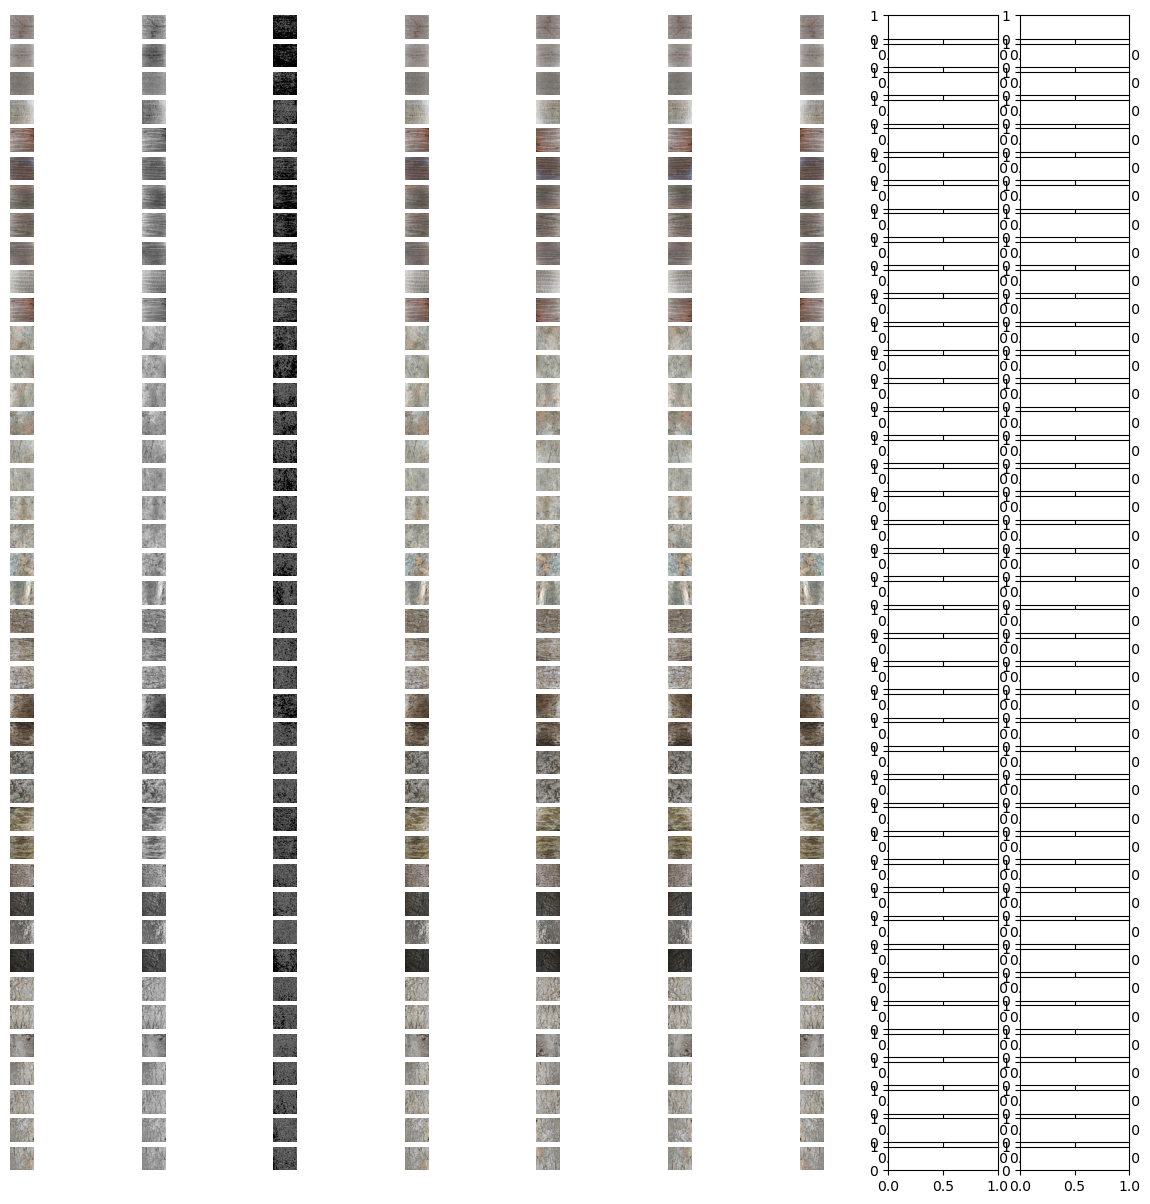

In [9]:
import cv2
import matplotlib.pyplot as plt

path = r".\tree"

dataset = create_dataset(path)
IMG_SIZE = (223, 223)

output_dir = "output"

# Initialize figure for plotting
fig, axes = plt.subplots(len(dataset['paths']), 9, figsize=(15, 15))

for i, (path, subf) in enumerate(zip(dataset['paths'], dataset['labels'])):
    
    image = cv2.imread(path)

    # Slice the string for filename
    start = path.rfind('\\')  # Windows path separator
    end = path.rfind('.')  # Before the extension
    filename = path[start + 1: end] + ".jpg"

    # Plot the original image
    axes[i, 0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    axes[i, 0].axis('off')

    # Apply preprocessing to the image and plot
    processed_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    axes[i, 1].imshow(processed_image, cmap='gray')
    axes[i, 1].axis('off')

    edges = cv2.Canny(processed_image, 100, 200)
    axes[i, 2].imshow(edges, cmap='gray')
    axes[i, 2].axis('off')

    resized_image = cv2.resize(image, IMG_SIZE)
    axes[i, 3].imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
    axes[i, 3].axis('off')

    flipped_images = [cv2.flip(image, flip_code) for flip_code in [-1, 0, 1]]
    for j, flip_code in enumerate([-1, 0, 1]):
        axes[i, 4 + j].imshow(cv2.cvtColor(flipped_images[j], cv2.COLOR_BGR2RGB))
        axes[i, 4 + j].axis('off')

    print(f"Processed and plotted images for {filename}")

plt.tight_layout()
plt.show()